In [37]:
# import library and load dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
%pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


Note: you may need to restart the kernel to use updated packages.


In [10]:
# load dataset
data_path = '../data/processed/data_cleaned_scaled.csv' 
data = pd.read_csv(data_path)

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k=2, score=0.9515588382190346
k=3, score=0.6325604046897081
k=4, score=0.7163773779698628
k=5, score=0.7040525057522793
k=6, score=0.6031948139211287
k=7, score=0.626998105028703
k=8, score=0.6247017283284849
k=9, score=0.638779946084193
k=10, score=0.5765382225214533


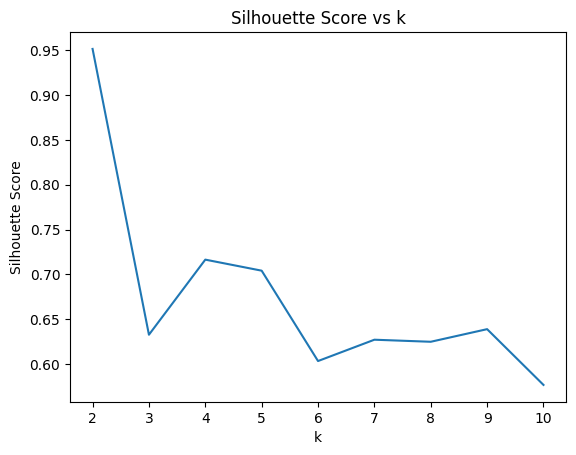

In [11]:
# search for the best k value for KMeans clustering
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores

plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()


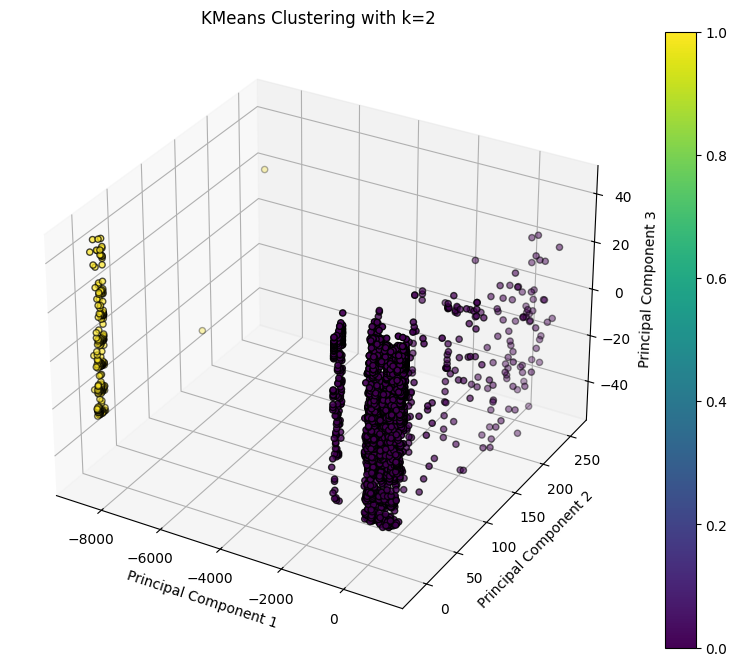

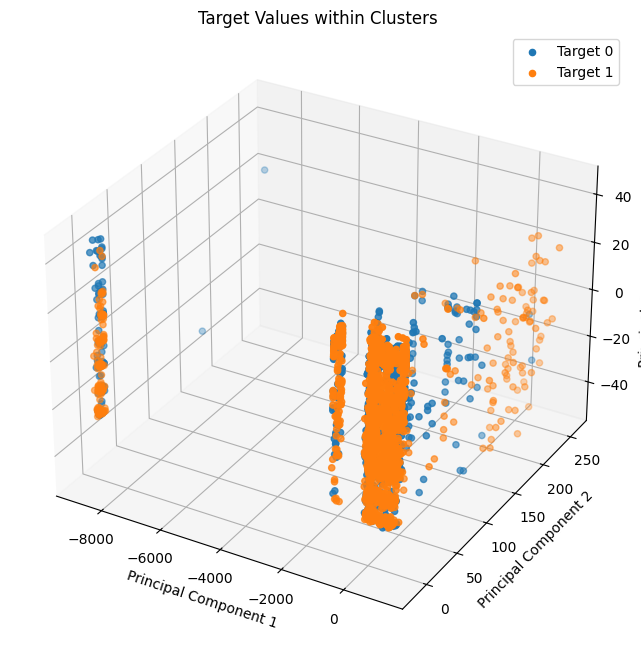

In [38]:
# draw the scatter plot of the data

pca = PCA(n_components=3)
X_scatter = pca.fit_transform(X)

best_k = scores.index(max(scores)) + 2

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scatter)

# plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=kmeans.labels_)
# plt.title(f"KMeans Clustering with k={best_k}")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

# # visualize y values with different colors based on cluster
# for i in sorted(y.unique()):
#     plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=f'Target {i}')
# plt.title('Target Values within Clusters')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.show()

# 3D plot for KMeans clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], 
                     c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax.set_title(f"KMeans Clustering with k={best_k}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter)
plt.show()

# 3D plot for Target Classes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in sorted(y.unique()):
    ax.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], X_scatter[y == i, 2], label=f'Target {i}')
ax.set_title('Target Values within Clusters')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()



k=2, score=0.9515588382190346
k=3, score=0.6325604046897081
k=4, score=0.7163773779698628
k=5, score=0.6760198464204903
k=6, score=0.6898990943297211
k=7, score=0.6152113715292014
k=8, score=0.6216169215782191
k=9, score=0.6388651110528714
k=10, score=0.5884255777097596


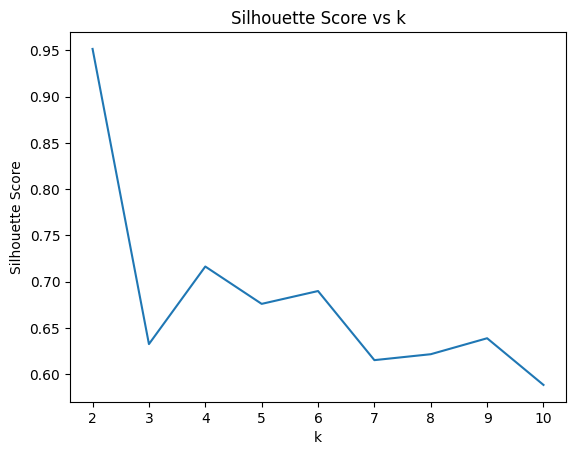

In [39]:
# use Hierarchical Clustering
scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(X_train)
    score = silhouette_score(X_train, agg.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

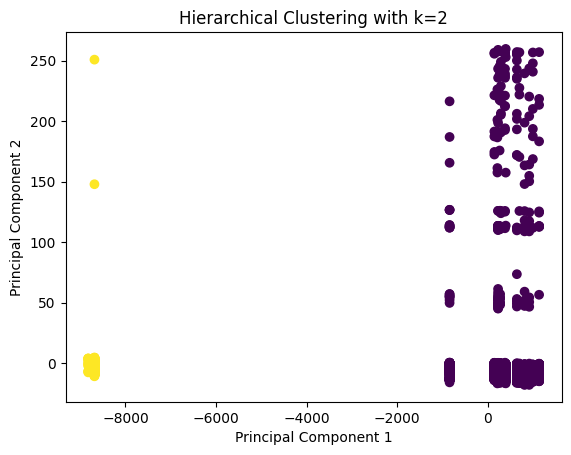

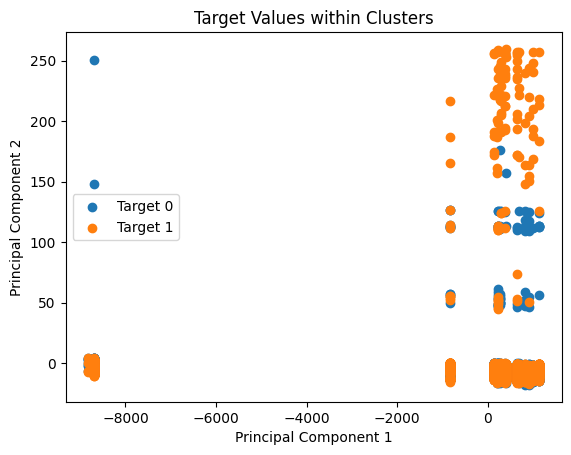

In [40]:
# draw the scatter plot of the data

best_k = scores.index(max(scores)) + 2

agg = AgglomerativeClustering(n_clusters=best_k)
agg.fit(X_scatter)

plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=agg.labels_)
plt.title(f"Hierarchical Clustering with k={best_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# visualize y values with different colors based on cluster

for i in sorted(y.unique()):
    plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=f'Target {i}')
plt.title('Target Values within Clusters')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Clustering Visualizations:
- The 2D/3D scatter plots for both KMeans and Hierarchical Clustering demonstrate that the clusters identified do not align well with the target classes (e.g., dropout, not droupout).
- When visualizing the target classes within the same 2D/3D space (using PCA-reduced components), there’s significant overlap between different target groups, indicating that the clusters are not distinctly aligned with the target categories.

Effectiveness of Clustering for Classification:
- The conclusion notes that clustering does not effectively separate the target classes. This suggests that the features in X may not have enough distinct separation to allow clustering algorithms to capture the target classes accurately.
- This lack of separation may imply that other techniques, such as supervised learning algorithms (e.g., logistic regression, decision trees, or support vector machines), may be more suitable for this dataset given the goal is to predict the target classes based on the features.